In [1]:
from address import load_obj, save_obj, results_obj
from data_constructor import Dataset
from model_constructor import Model
from interpreter_constructor import Interpreter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


datasets = ['helix_matching_random_amp_feat_time'] #'circles','moons','helix_1_start','helix_2_start','helix_1_random_time','helix_2_random_time','helix_random_feat_random_time','helix_matching_random_amp_feat_time', 'helix_matching_random_amp_feat_time_no_phase'
train_fraction = 0.8
seed_int = 54321
idx_list = range(100)
subset = 'train'
model_type = 'conv-relu-mlp' # 'relu-mlp', 'conv-relu-mlp'

2023-06-16 18:00:34.112902: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
for data_str in datasets:
    data = Dataset(data_str, train_fraction, seed_int)
    model = Model(seed_int, data, model_type)
    model.train_model()



2023-06-16 18:00:35.194776: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-16 18:00:35.195276: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-06-16 18:00:35.247271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-16 18:00:35.247663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:06:00.0 name: NVIDIA GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.815GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2023-06-16 18:00:35.247680: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-16 18:00:35.248684: I tensorflow/stream_executor/platf

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 72, 1, 5)]        0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 70, 1, 32)         480       
_________________________________________________________________
tf.nn.max_pool_with_argmax ( MaxPoolWithArgmax(output= 0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
Dense0 (Dense)               (None, 100)               3300      
_________________________________________________________________
Dense1 (Dense)               (None, 50)                5050      
_________________________________________________________________
Dense2 (Dense)               (None, 100)               5100  

2023-06-16 18:00:36.134440: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-06-16 18:00:36.264299: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-06-16 18:00:36.853723: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-06-16 18:00:36.893631: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


250/250 [==============================] - 3s 5ms/step - loss: 0.5820 - f1_loss: 0.4288 - val_loss: 0.0685 - val_f1_loss: 0.0496
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0420 - f1_loss: 0.0328 - val_loss: 0.0290 - val_f1_loss: 0.0160
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0308 - f1_loss: 0.0186 - val_loss: 0.0096 - val_f1_loss: 0.0081
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0118 - f1_loss: 0.0084 - val_loss: 0.0101 - val_f1_loss: 0.0047
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0083 - f1_loss: 0.0055 - val_loss: 0.0076 - val_f1_loss: 0.0038
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0147 - f1_loss: 0.0075 - val_loss: 0.0038 - val_f1_loss: 0.0034
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0042 - f1_loss: 0.0032 - val_loss: 0.0041 - val_f1_loss: 0.0024
Epoch 8/100
250/250 [====

In [3]:
#Interpret multiple test instances 
interpreter = Interpreter(data, model, idx_list, subset='test',use_bias=True)


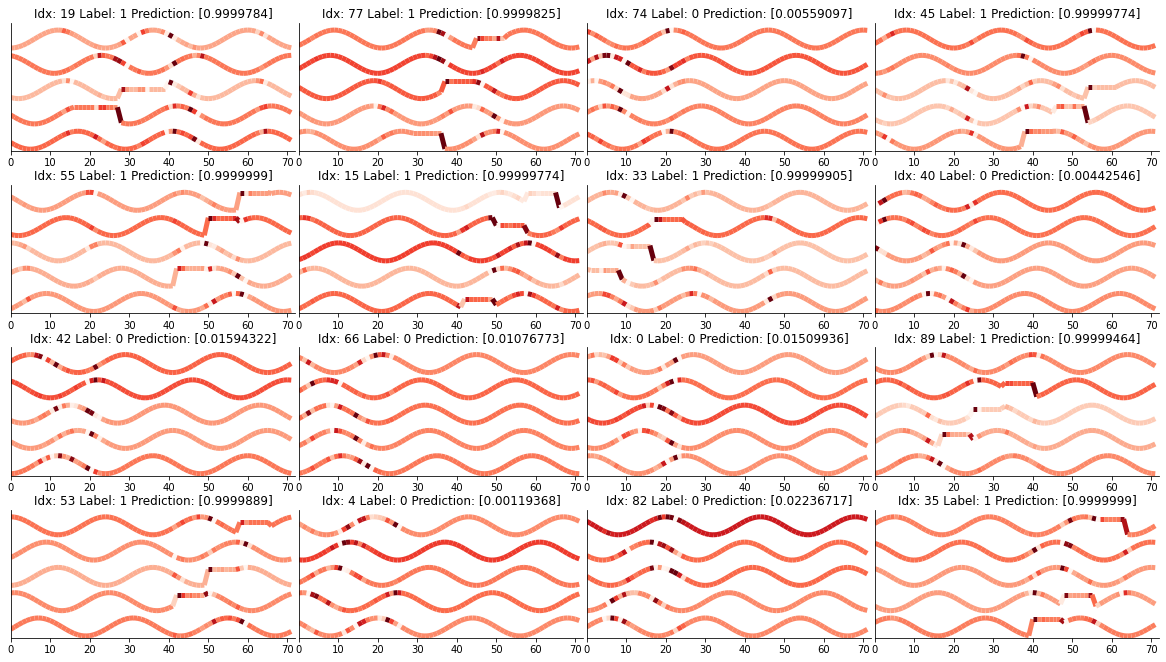

In [4]:
# Plot
from plotter import plotMultivariateWeihts
plotMultivariateWeihts(interpreter,4,name = "Explanations",scale = 'local',linewidth=5.,cmap='Reds')

suma de coeficientes -6.426419529908653 output 0.0016156200622940659 bias -13.103583335876465


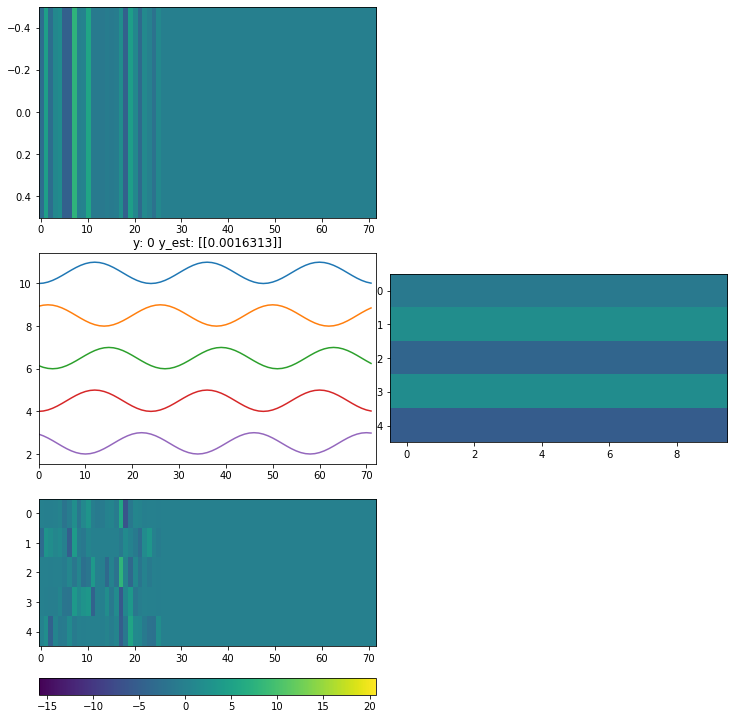

In [9]:
# # Basic algorithm
y_test = model.y_test

idx = np.random.permutation(np.argwhere(y_test==0))[0,0]
sample = model.X_test[idx,...]

y_test_ = model.classifier.predict(sample.reshape(1,72,1,5))
maxPos,maxVal,featMap, weights,deConv = model.getConvInfo(sample.reshape(1,72,1,5))
maxPos = np.argmax(featMap,axis=0)
#denseWeights = model.getDenseInfo(sample.reshape(1,72,1,5))
denseWeights,_ = interpreter.mlp_relu_interpretation(maxVal)
denseWeights =denseWeights.squeeze()
#denseWeights = denseWeights*(maxVal>0)
#denseWeights[denseWeights<0] = 0
#n = 32  # Number of top values to be extracted
featMap_steps = 24
percentage_weights = 1
#####
total_val_weights = np.sum(np.abs(maxVal*denseWeights))
total_val_weights_percentage = total_val_weights*percentage_weights
sorted_val_weights = np.sort(np.abs(maxVal*denseWeights))
sorted_val_weights = sorted_val_weights[::-1]
sorted_val_weights_cum_sum = np.cumsum(sorted_val_weights)
for n in range(len(sorted_val_weights_cum_sum)):
    if sorted_val_weights_cum_sum[n] >= total_val_weights_percentage:
        break
#####
idx_top = np.argsort(np.abs(maxVal*denseWeights))[-n:]
#idx_top = np.argsort(maxVal*denseWeights)[-n:] 
topPos = maxPos[idx_top]
topVals = maxVal[idx_top]
# Mask creation
expl = np.zeros((72,5))
expl_1 = np.zeros((72,5))
for i in range(n):
    #mask = np.zeros((featMap_steps,1))
    #mask[topPos[i],0] = 1
    #expl = expl + denseWeights[idx_top[i]]*np.kron(mask,weights[...,idx_top[i]])
    mask_1 = np.zeros((1,deConv.input.shape[1],deConv.input.shape[2],deConv.input.shape[3]))
    mask_1[0,topPos[i],0,idx_top[i]] = 1
    expl_1 = expl_1 + denseWeights[idx_top[i]]*deConv.predict(mask_1).squeeze()
expl_1 = expl_1*sample.squeeze()+ np.ones_like(expl_1)*(_/360)
#expl_1 = (expl_1+10)/20.
# Plotting a sample
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(np.sum(expl_1.T,axis=0,keepdims=True),cmap='viridis',interpolation=None,aspect='auto',vmin=interpreter.z_range[0],vmax=interpreter.z_range[1])
plt.subplot(323)
for i in range(5):
    plt.plot(sample.squeeze()[...,i]+10-i*2)
    plt.xlim((0,72))
    plt.title(f"y: {y_test[idx]} y_est: {y_test_}")
    
plt.subplot(324)
plt.imshow(np.repeat(np.sum(expl_1.T,axis=1,keepdims=True),10,axis=1),cmap='viridis',vmin=interpreter.z_range[0],vmax=interpreter.z_range[1],interpolation=None,aspect='equal')
plt.subplot(325)


plt.imshow(expl_1.T,cmap='viridis',interpolation=None,aspect='auto',vmin=interpreter.z_range[0],vmax=interpreter.z_range[1])
plt.tight_layout(pad=0,h_pad=0.2,w_pad=0.1)
plt.colorbar(orientation='horizontal')

import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))
print(f"suma de coeficientes {np.sum(expl_1)} output {sigmoid(np.sum(expl_1))} bias {np.sum(_)}")


In [6]:
_

array([-4.9180546], dtype=float32)

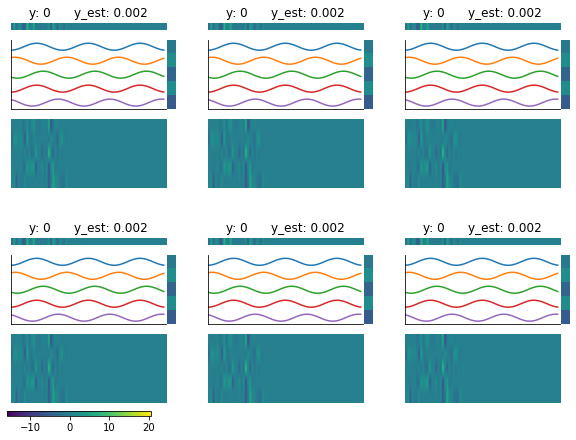

In [10]:
fig = plt.figure(figsize=(10,7))
# N de filas 
n = 2
# N de columnas 
l = 3

gs0 = fig.add_gridspec(n, l,wspace=0.2,hspace=0.3)
dummy_data = np.random.random(100)
for gs in range(n*l):
    axs= gs0[gs].subgridspec(3,2,width_ratios=[0.95,0.05],height_ratios=[0.05,0.45,0.45],wspace=0.01)
    
    # time steps  z-terms 
    ax= fig.add_subplot(axs[0,0])
    ax.set_xticks([])
    ax.set_yticks([]) 
    [spine.set_visible(False) for _,spine in ax.spines.items()]
    ax.imshow(np.sum(expl_1.T,axis=0,keepdims=True),cmap='viridis',interpolation=None,aspect='auto',vmin=interpreter.z_range[0],vmax=interpreter.z_range[1])
    ax.set_title(f"y: {y_test[idx]}      y_est: %1.3f"%y_test_[0,0])

    # Input data 
    ax= fig.add_subplot(axs[1,0])
    [spine.set_visible(False) for _,spine in ax.spines.items() if _ in ['top','right']]
    ax.set_xticks([])
    ax.set_yticks([]) 
    for i in range(5):
        ax.plot(sample.squeeze()[...,i]+10-i*2)
        ax.set_xlim((0,72))
        
    # feat z-terms
    ax= fig.add_subplot(axs[1,1])
    ax.set_xticks([])
    ax.set_yticks([]) 
    [spine.set_visible(False) for _,spine in ax.spines.items()]
    ax.imshow(np.sum(expl_1.T,axis=1,keepdims=True),cmap='viridis',vmin=interpreter.z_range[0],vmax=interpreter.z_range[1],interpolation=None,aspect='auto')
    
    # Z-terms
    ax= fig.add_subplot(axs[2,0])
    [spine.set_visible(False) for _,spine in ax.spines.items()]
    ax.set_xticks([])
    ax.set_yticks([]) 
    im = ax.imshow(expl_1.T,cmap='viridis',interpolation=None,aspect='auto',vmin=interpreter.z_range[0],vmax=interpreter.z_range[1])

cax = plt.axes([0.12,0.1,0.2,0.01])
plt.colorbar(im,orientation='horizontal',cax=cax)


In [8]:
gs0

GridSpec(2, 3)